# **<center>Recherche Opérationnelle<br /> Projet </center>**

<center> RUDONI Antonin, SIMON Thomas, AMIRBEKYAN Alen, AFANVI Kodjo Roland </center>

# **Introduction**
L'Agence de l'Environnement et de la Maîtrise de l’Énergie (ADEME) a lancé un appel à manifestation d’intérêt pour promouvoir de nouvelles solutions de mobilité durable adaptées à différents territoires. Notre structure, CesiCDP, spécialiste en Mobilité Multimodale Intelligente, répondons à cet appel en s'appuyant nos études antérieures et notre expertise en technologies de transport économiques et écologiques.

Notre objectif est de minimiser les déplacements et la consommation des véhicules lors des livraisons en résolvant un problème algorithmique classique : calculer une tournée optimale sur un réseau routier (VRP) reliant plusieurs villes et revenant au point de départ, tout en minimisant la durée totale. Cette solution est applicable à divers domaines tels que la distribution du courrier, la livraison de produits, et le ramassage des ordures, avec un impact environnemental significatif.

# **Périmètre**

## **Besoins**
Réduire les coûts de transport et les émissions de gaz à effet de serre en optimisant les itinéraires de livraison.

## **Reformulation du problème**
Le problème peut être défini comme suit : étant donné k camions et n villes, 
trouver l'itinéraire optimal pour chaque camion de manière à ce que la distance totale parcourue soit minimisée.

## **Choix de modélisation** 
Pour modéliser ce problème, nous utilisons un graphe non orienté.

### **Représentation Graphique**
- Sommets : Les villes à visiter
- Poids des arêtes : La distance entre deux villes
- Arêtes : Les chemins possibles entre les villes

### **Choix du type de données en entrée**

Les données en entrée incluent :

- La liste des villes à visiter
- Les distances entre chaque paire de villes
- La capacité des camions
- Le nombre de camions disponibles

# **Représentation Graphique** 

Graphe : 
- Sommets -> Villes 
- Poids des arêtes -> Distance entre 2 villes 
- Arêtes -> Chemin entre les villes 



#### **Exemple de représentation par un graphe de ville lié par des routes**
<img src="graphe.png" alt="Description de l'image" style="width:50%;"/>


# **Complexité**

## **Definition du problème d'optimisation** 
Le problème de la tournée de véhicules (VRP) consiste à trouver le parcours optimal pour $k$ camions afin de visiter $n$ villes, en minimisant la distance totale parcourue tout en assurant que chaque ville soit visitée exactement une fois.

## **Problème de décision associé**
Existe-t-il une solution pour $k$ camions visitant $n$ villes où la distance totale parcourue ne dépasse pas une valeur donnée ?

## **Démonstration TSP par rapport au cycle hamiltonien**
Le TSP est une généralisation du cycle hamiltonien, qui est un problème classique en théorie de la complexité. TSP demande de trouver le plus court chemin passant par un ensemble de villes et revenant à la ville de départ. Il a été prouvé que le TSP est NP-complet en se basant sur le problème du cycle hamiltonien.

## **Réduction du TSP au VRP**
Transformation : On peut transformer n'importe quelle instance du TSP en une instance du VRP avec $k$ = 1. Si on peut résoudre VRP, on peut résoudre TSP en définissant un seul camion pour parcourir toutes les villes.
Preuve de NP-complétude du VRP : Puisque le TSP est un cas particulier du VRP, et étant donné que le TSP est NP-complet, il s'ensuit que le VRP est au moins aussi difficile que le TSP. Par conséquent, le VRP est également NP-complet.

## **Appartenance à NP**
Pour montrer que le VRP appartient à NP, il suffit de vérifier qu'une solution donnée peut être vérifiée en temps polynomial.
On peut en temps polynomial vérifier :

Que chaque ville est visitée exactement une fois.
Que la distance totale parcourue est calculée correctement et ne dépasse pas une valeur donnée.
Ainsi, le VRP appartient à NP, et étant donné que le VRP est au moins aussi difficile que le TSP, nous concluons que le VRP est NP-difficile.

## **Démonstration**

### **Réduction du problème du Cycle Hamiltonien au TSP**

Pour transformer une instance du problème du Cycle Hamiltonien \(G = (V, E)\) en une instance du problème du TSP :

**Construction du graphe complet** :
   - Création un graphe complet \(G' = (V, E')\), où chaque paire de nœuds est connectée par une arête.
   - Le nombre de nœuds dans \(G'\) est le même que dans \(G\).

**Ajout des arêtes et des coûts** :
   - Ajout chaque nœud \(v\) à \(V'\) en \(O(1)\).
   - Pour chaque paire de nœuds \((u, v)\), vérifier si \((u, v)\) est une arête dans \(G\). Cette vérification se fait en temps constant \(O(1)\).
   - Ajout des coûts aux arêtes :
     - Si \((u, v)\) est une arête dans \(G\), attribuer un coût de 1.
     - Sinon, attribuer un coût très élevé (infini).

**Complexité** :
   - La transformation de \(G\) en \(G'\) se fait en \(O($n^2$)\), où \(n\) est le nombre de sommets, car chaque paire de nœuds est vérifiée et connectée.

Ainsi, cette transformation garantit que le problème du Cycle Hamiltonien peut être converti en une instance du TSP en temps polynomial.


## Algorithme de certificat de TSP

In [25]:
from math import sqrt

def calculate_distance(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def is_valid_tsp_solution(coordinates, tour):
    num_cities = len(coordinates)
    visited = [False] * num_cities

    print(f"Vérification de la tournée: {tour}")

    # Chaque tournée commence par le depot
    if tour[0] != tour[-1]:
        print("La tournée ne commence ou ne finit pas au même point.")
        return False

    for i in range(len(tour) - 1):
        from_city = tour[i]
        to_city = tour[i + 1]

        # Chaque ville doit être visitée exactement une fois
        if visited[from_city]:
            print(f"La ville {from_city} est visitée plus d'une fois.")
            return False
        
        distance = calculate_distance(coordinates[from_city], coordinates[to_city])
        
        # Distance non nulle entre chaque paire de villes successives
        if distance == 0 and from_city != to_city:
            print(f"Il n'y a pas de distance entre {from_city} et {to_city}.")
            return False

        # Marque la ville comme visitée
        visited[from_city] = True  

    # Vérifie que toutes les villes ont été visitées exactement une fois
    if not all(visited):
        print("Toutes les villes ont pas été visitées.")
        return False

    # Vérification de retour au depot
    distance = calculate_distance(coordinates[tour[-2]], coordinates[tour[-1]])
    if distance == 0 and tour[-2] != tour[-1]:
        print(f"Il n'y a pas de distance entre {tour[-2]} et {tour[-1]}.")
        return False

    return True

coordinates = [
    (0, 0),  
    (1, 2),  
    (4, 0), 
    # (3,3), 
    (6, 3)   
]

tour = [0, 1, 3, 2, 0]  

print(is_valid_tsp_solution(coordinates, tour))


Vérification de la tournée: [0, 1, 3, 2, 0]
True


## **Pire des cas**
### **Complexité asymptotique** 

Dans le pire des cas, le nombre de solutions potentielles du VRP augmente de manière exponentielle avec le nombre de villes et de camions. 
Pour :

- $n$ villes et $k$ camions, il existe O($k^n$) manières de répartir les villes entre les camions
- Chaque répartition, il faut trouver l'itinéraire optimal pour chaque camion, ce qui est un problème de TSP pour chaque sous-ensemble de villes

La complexité asymptotique du VRP est donc exprimée comme exponentielle en fonction du nombre de villes, rendant le problème impraticable pour de grandes instances.


# **Modèle mathématique**

## **Paramètres**

$Q$ : La capacité d'un camion </br>
$d_i$ : La demande d'une ville </br>
$n$ : Le nombre total de villes à visiter</br>
$k$ : Le nombre total de véhicules disponibles</br>


## **Variables de décisions**

$c_{ij}$ : Le coût est la distance pour aller de la ville $i$ à la ville $j$</br>
$x_{ij}^k$ : Variables de décision, qui permet de savoir si le véhicule $k$ emprunte l'arête $(i, j)$</br>
$u_i$ : Variable continue représentant l'ordre de visite de la ville $i$.</br>

## **Fonction Objective**

$\min \sum\limits_{k \in K} \sum\limits_{i \in N} \sum\limits_{j \in N} c_{ij} x_{ij}^k$</br>

## **Contraintes** :</br>

Visite unique des villes : </br>

$\sum\limits_{k \in K} \sum\limits_{j \in N} x_{ij}^k = 1 \quad \forall i \in N, i \neq 0$</br>

Entrée puis sortie dans chaque ville :</br>

$\sum\limits_{j \in N} x_{ij}^k = \sum\limits_{j \in N} x_{ji}^k \quad \forall k \in K, \forall i \in N$</br>

Chaque véhicule doit commencer et se terminer au dépôt :</br>

$\sum\limits_{j \in N} x_{0j}^k = 1 \quad \forall k \in K$</br>
$\sum\limits_{i \in N} x_{i0}^k = 1 \quad \forall k \in K$</br>

Capacité maximum des camions :</br>

$\sum\limits_{i \in N} \sum\limits_{j \in N, j \neq 0} d_j x_{kij} \leq Q \quad \forall k \in K$

Empêche la formation de sous-tours en utilisant les contraintes de Miller-Tucker-Zemlin (MTZ) :</br>

$u_i^k - u_j^k + n x_{ij}^k \leq n-1 \quad \forall i, j \in N, i \neq j, k \in K$</br>
$1 \leq u_i \leq n \quad \forall i \in N, i \neq 0$</br>

Les variables de décision sont binaires :</br>


$x_{ij}^k \in \{0, 1\} \quad \forall i, j \in N, k \in K$</br>


# **Choix et implémentation d'une heuristique**


275.90330879874426


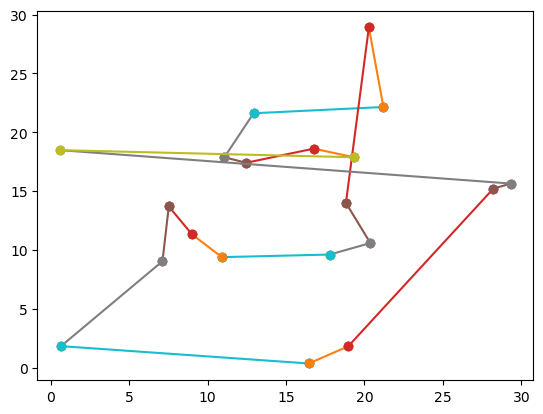

In [26]:
import matplotlib.pyplot as plt
from math import sqrt
from random import random


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.voision = []

    def arc(self, pointB, plt):
        if self != pointB:
            plt.plot((self.x, pointB.x), (self.y, pointB.y), marker = 'o')

    def sommet(self, plt):
        plt.plot(self.x, self.y,'o')
    
    def distance(self, pointB):
        return sqrt((self.x - pointB.x)**2  + (self.y - pointB.y)**2)

points = []

for i in range(20):
    points.append(Point(x=random()*30, y=random()*30))

def tsp(depart, points, distanceTotal = 0, pointsparc = []):
    pointsparc.append(depart)
    if len(pointsparc) == len(points):
        return (distanceTotal + pointsparc[-2].distance(depart), pointsparc)
    
    min = 1000000000000
    voisin = None
    for p in points:
        if not p in pointsparc:
            distance = depart.distance(p)
            if distance < min:
                min = distance
                voisin = p
    
    return tsp(voisin, points, distanceTotal+distance, pointsparc)

res = tsp(points[0], points)

distance = res[0]

for i in range(len(res[1])-1):
    res[1][i].sommet(plt)
    res[1][i].arc(res[1][i+1], plt)

res[1][0].arc(res[1][-1], plt)

print(distance)

# for p in points:
#     p.sommet(plt)
#     points[5].arc(p, plt)

plt.show()

# **Références**
1 : Malapert, A. (2006). Optimisation de tournées de véhicules pour l’exploitation de Réseau Telecom. Rapp. Stage Diplôme Master Intell. Artif. Décision Univ. Paris, 6.

2 : Bederina, H. (2018). Problèmes de tournées de véhicules robustes multi-objectifs (Doctoral dissertation, Université de Picardie Jules Verne).

3 : http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf 

4 : https://www.lri.fr/~jcohen/documents/enseignement/VoyageurDeCommerce.pdf

# **Data sets: Données générées aléatoirement et données réelles**

## **Génération de données** 


In [27]:
# True = données réels / false = données random
use_real_coordinates = False

In [28]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from time import sleep
from sklearn.preprocessing import MinMaxScaler
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpBinary
import matplotlib.pyplot as plt
import random

random.seed(3)

# génération de coordonnées aléatoires
def generate_random_coordinates(number_of_cities):
    coordinates = []
    for _ in range(number_of_cities):
        x = random.uniform(0, 100)
        y = random.uniform(0, 100)
        coordinates.append((x, y))
    return coordinates

# charge les villes
cities_df = pd.read_csv('ville.csv')

if use_real_coordinates:
    geolocator = Nominatim(user_agent="city_locator")

    coordinates = []
    for city in cities_df['ville']:
        try:
            location = geolocator.geocode(city)
            if location:
                coordinates.append((location.latitude, location.longitude))
        except Exception as e:
            print(f"Erreur : {city}: {e}")
        sleep(1)
else:
    # number_of_cities = len(cities_df) 
    number_of_cities = 20
    coordinates = generate_random_coordinates(number_of_cities)


# convertion des données lat ou long en x et y
latitudes, longitudes = zip(*coordinates)
scaler_lat = MinMaxScaler(feature_range=(0, 100))
scaler_lon = MinMaxScaler(feature_range=(0, 100))
x_scaled = scaler_lon.fit_transform(np.array(longitudes).reshape(-1, 1)).flatten()
y_scaled = scaler_lat.fit_transform(np.array(latitudes).reshape(-1, 1)).flatten()
scaled_coordinates = list(zip(x_scaled, y_scaled))

n = len(scaled_coordinates)
# matrice des distances entre chaque ville
def calculeDistance():
    n = len(scaled_coordinates)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distance_matrix[i, j] = np.linalg.norm(np.array(scaled_coordinates[i]) - np.array(scaled_coordinates[j]))
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

# Paris comme lieu de dépôt 
paris_index = cities_df[cities_df['ville'] == 'Paris'].index[0]

# si Paris n'est pas en premier le mettre en premier
if paris_index != 0:
    cities_df = cities_df.reindex([paris_index] + list(range(0, paris_index)) + list(range(paris_index + 1, n)))
    cities_df.reset_index(drop=True, inplace=True)
    new_order = cities_df.index.tolist()

distance_matrix = calculeDistance()

def adjacency_list_calc():
    adjacency_list_res = {}
    for i in range(n):
        adjacency_list_res[cities_df['ville'][i]] = {}
        for j in range(n):
            if i != j:
                adjacency_list_res[cities_df['ville'][i]][cities_df['ville'][j]] = distance_matrix[i][j]
        return adjacency_list_res

adjacency_list = adjacency_list_calc()
# Liste d'adjacency avec les distances 


## **Solveur PULP**

### **Définition des paramètres**

In [29]:
num_trucks = 1 # nb camions
truck_capacity = 300  # dapacité max des camions
demand = [random.randint(1, 20) for _ in range(n)]  # demande de chaque ville
demand[0] = 0  # depot

### **Solveur**

In [30]:
from pulp import LpProblem, LpVariable, lpSum, LpBinary, LpMinimize, PULP_CBC_CMD
import matplotlib.pyplot as plt
import random

# Création du modèle CVRP avec Pulp
cvrp_model = LpProblem("CVRP", LpMinimize)

# Variables de décision pour les trajets (x)
x = LpVariable.dicts('x', [(k, i, j) for k in range(num_trucks) for i in range(n) for j in range(n)], cat=LpBinary)

# Variables de décision pour les charges des camions (u)
u = LpVariable.dicts('u', [(k, i) for k in range(num_trucks) for i in range(n)], lowBound=0)

# Fonction objective : minimiser la distance totale parcourue
cvrp_model += lpSum(distance_matrix[i][j] * x[k, i, j] for k in range(num_trucks) for i in range(n) for j in range(n))

## Contraintes
# chaque ville doit être visitée exactement une fois
for j in range(1, n):
    cvrp_model += lpSum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1

# chaque camion part du dépôt et revient au dépôt
for k in range(num_trucks):
    cvrp_model += lpSum(x[k, 0, j] for j in range(1, n)) == 1
    cvrp_model += lpSum(x[k, i, 0] for i in range(1, n)) == 1

# capacité des camions
for k in range(num_trucks):
    cvrp_model += lpSum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity

# chaque camion commence et finit au dépôt et respecter la capacité
for k in range(num_trucks):
    for i in range(1, n):
        cvrp_model += lpSum(x[k, i, j] for j in range(n) if i != j) == lpSum(x[k, j, i] for j in range(n) if i != j)
        cvrp_model += u[(k, i)] <= truck_capacity
        cvrp_model += u[(k, i)] >= demand[i]
        for j in range(1, n):
            if i != j:
                cvrp_model += u[(k, j)] >= u[(k, i)] + demand[j] - truck_capacity * (1 - x[k, i, j])

cvrp_model.solve(PULP_CBC_CMD(cuts=False, presolve=False, msg=False))

1

### **Affichage**

Solution optimale:
Route pour le camion 1:
Route de Paris à Lyon
Route de Lyon à Toulouse
Route de Marseille à Montpellier
Route de Toulouse à Angers
Route de Nice à Villeurbanne
Route de Nantes à Nîmes
Route de Strasbourg à Saint-Étienne
Route de Montpellier à Le Havre
Route de Bordeaux à Grenoble
Route de Lille à Bordeaux
Route de Rennes à Marseille
Route de Reims à Strasbourg
Route de Le Havre à Nice
Route de Saint-Étienne à Nantes
Route de Toulon à Reims
Route de Grenoble à Toulon
Route de Dijon à Lille
Route de Angers à Dijon
Route de Nîmes à Rennes
Route de Villeurbanne à Paris


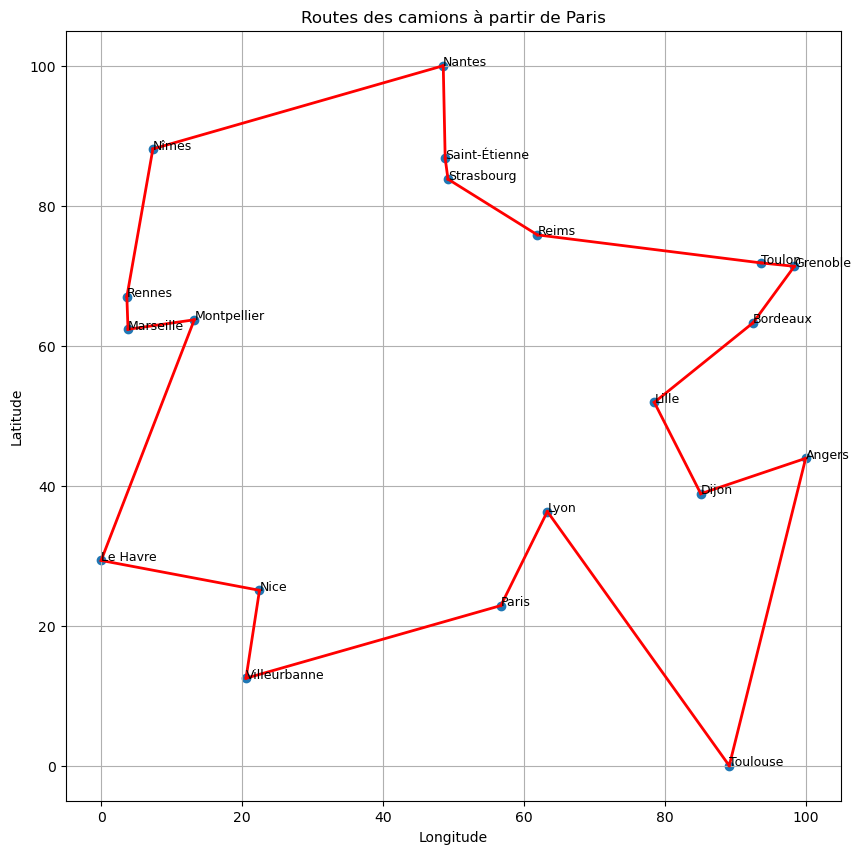

In [31]:
solution = [[] for _ in range(num_trucks)]
for k in range(num_trucks):
    for i in range(n):
        for j in range(n):
            if x[k, i, j].varValue is not None and x[k, i, j].varValue > 0.5:
                solution[k].append((i, j))

print("Solution optimale:")
for k in range(num_trucks):
    print(f"Route pour le camion {k + 1}:")
    for (i, j) in solution[k]:
        print(f"Route de {cities_df['ville'][i]} à {cities_df['ville'][j]}")

plt.figure(figsize=(10, 10))
plt.scatter(x_scaled, y_scaled)

for i, (x, y) in enumerate(scaled_coordinates):
    plt.text(x, y, cities_df['ville'][i], fontsize=9)

colors = ['r', 'b', 'g', 'm', 'c']  
for k in range(num_trucks):
    for (i, j) in solution[k]:
        plt.plot([x_scaled[i], x_scaled[j]], [y_scaled[i], y_scaled[j]], colors[k % len(colors)] + '-', lw=2)

plt.title('Routes des camions à partir du dépôt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## **Solver GUROBI**

### **Définition des paramètres**

In [32]:
num_trucks = 2  # nb camions
truck_capacity = 100  # capacité max des camions
demand = [random.randint(1, 20) for _ in range(n)]  # demande de chaque ville
demand[0] = 0  # depot

### **Solveur**

In [33]:
from gurobipy import Model, GRB, quicksum
import matplotlib.pyplot as plt

cvrp_model = Model("CVRP")

# Variables de décision pour les trajets (x)
x = cvrp_model.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

# Variables de décision pour les charges des camions (u)
u = cvrp_model.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

# fonction objective : minimiser la distance totale parcourue
cvrp_model.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                 for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

## Contraintes
# chaque ville doit être visitée exactement une fois
for j in range(1, n):
    cvrp_model.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

# chaque camion part du dépôt et revient au dépôt
for k in range(num_trucks):
    cvrp_model.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
    cvrp_model.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

# capacité des camions
for k in range(num_trucks):
    cvrp_model.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

# chaque camion commence et finit au dépôt et respecte la capacité
for k in range(num_trucks):
    for i in range(1, n):
        cvrp_model.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
        cvrp_model.addConstr(u[k, i] <= truck_capacity)
        cvrp_model.addConstr(u[k, i] >= demand[i])
        for j in range(1, n):
            if i != j:
                cvrp_model.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

# sous-tours MTZ
for k in range(num_trucks):
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                cvrp_model.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])


cvrp_model.setParam('Cuts', 0)
cvrp_model.setParam('Presolve', 0)
cvrp_model.setParam('Heuristics', 0)
cvrp_model.setParam('OutputFlag', 0)

cvrp_model.optimize()

Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0


### **Affichage**

Solution optimale:
Route pour le camion 1:
Route de Paris à Reims
Route de Marseille à Montpellier
Route de Nice à Villeurbanne
Route de Nantes à Nîmes
Route de Strasbourg à Saint-Étienne
Route de Montpellier à Montpellier
Route de Montpellier à Le Havre
Route de Rennes à Marseille
Route de Rennes à Rennes
Route de Reims à Strasbourg
Route de Le Havre à Nice
Route de Le Havre à Le Havre
Route de Saint-Étienne à Nantes
Route de Nîmes à Rennes
Route de Villeurbanne à Paris
Route pour le camion 2:
Route de Paris à Lyon
Route de Lyon à Lille
Route de Toulouse à Paris
Route de Bordeaux à Toulon
Route de Lille à Bordeaux
Route de Toulon à Grenoble
Route de Grenoble à Angers
Route de Dijon à Toulouse
Route de Angers à Dijon


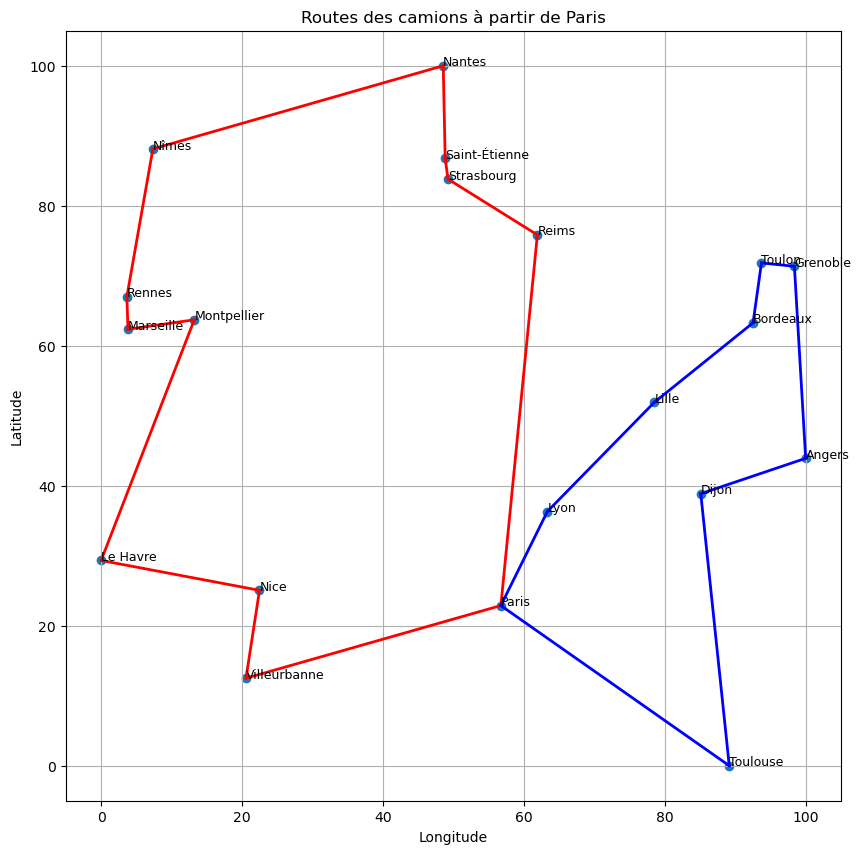

In [34]:
if cvrp_model.status == GRB.OPTIMAL:
    solution = [[] for _ in range(num_trucks)]
    for k in range(num_trucks):
        for i in range(n):
            for j in range(n):
                if x[k, i, j].X > 0.5:
                    solution[k].append((i, j))

    print("Solution optimale:")
    for k in range(num_trucks):
        print(f"Route pour le camion {k + 1}:")
        for (i, j) in solution[k]:
            print(f"Route de {cities_df['ville'][i]} à {cities_df['ville'][j]}")

    plt.figure(figsize=(10, 10))
    x_scaled, y_scaled = zip(*scaled_coordinates)
    plt.scatter(x_scaled, y_scaled)

    for i, (x, y) in enumerate(scaled_coordinates):
        plt.text(x, y, cities_df['ville'][i], fontsize=9)

    colors = ['r', 'b', 'g', 'm', 'c']  
    for k in range(num_trucks):
        for (i, j) in solution[k]:
            plt.plot([x_scaled[i], x_scaled[j]], [y_scaled[i], y_scaled[j]], colors[k % len(colors)] + '-', lw=2)
            
    plt.title('Routes des camions à partir du dépôt')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
else:
    print(f"Pas de solution optimale trouvée. Statut du modèle: {cvrp_model.status}")

## **Plan d'expérience**

### **Instances faciles**

Nous avons effectué des tests de résolution de problème avec des instances facile incluant 5 villes avec 1 ou 2 camions, nous avons pas trouvé utile de faire avec plus de camion pour de petites instances.

<img src="facile.png" alt="Description de l'image" style="width:50%;"/>

### **Instances moyennes**

Nous avons effectué des tests de résolution de problème avec des instances moyenne incluant entre 10 et 15 villes avec entre 1 et 5 camions, en faisant aussi varier la capacité des camions qui influait sur les trajets effectués par ceci.

On a pu voir la différence de temps de résolution entre Pulp et Gurobi.

<img src="moyenne.png" alt="Description de l'image" style="width:50%;"/>

### **Instances difficiles**

Nous avons effectué des tests de résolution de problème avec des instances difficle incluant 25 villes avec entre 1 et 2 camions, en faisant aussi varier la capacité des camions qui influait sur les trajets effectuer par ceci.

On a pu voir la différence de temps significatif de résolution entre Pulp et Gurobi.

Nous voulions aller plus loin dans l'observation et l'analyse des solveurs mais les limites techniques ne nous permettent pas de comparer Gurobi à Pulp sans Licence payante ou étudiante. 

<img src="difficile.png" alt="Description de l'image" style="width:50%;"/>

### **Autres tests**

Nous avons également testé les fonctionnalités que l'on peut activé ou non pour améliorer le temps de résolution d'une instance à savoir Cut, Presolve et Heuristique (Gurobi seulement). 



## **Presolve**

Voici les résultats obtenus avec des instances variant de 1 à 20 villes avec presolve : 


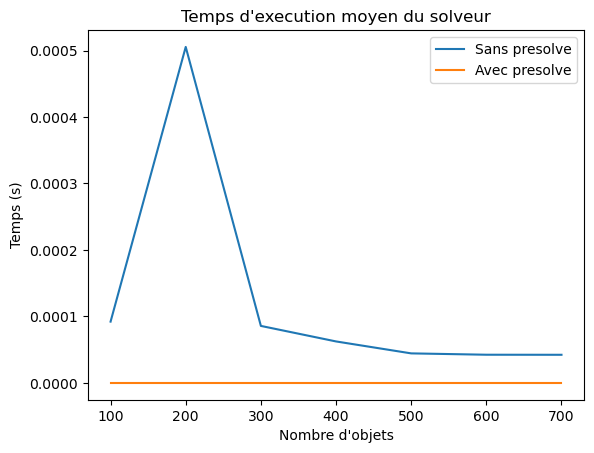

In [35]:
# presolve
import time

somme_temps = 0

start_time = time.time()
cvrp_model.optimize()
computation_time=  time.time() - start_time
somme_temps +=computation_time

nb_instances = 100
nb_obj = 100 
poids_min, poids_max, val_min, val_max = 500,1000,500,1000 
Capacity = 1000
random.seed(a=3)
#Listes pour stocker les résultats
l_temps_moyens = []
l_temps_moyens_avec_presolve = []
nb_objets_a_tester = [100, 200, 300, 400, 500, 600, 700]
for nb_obj in nb_objets_a_tester:
    somme_temps = 0
    somme_temps_presolve = 0
    for i in range(nb_instances):
        
        #Calcul sans presolve
        start_time = time.time()
        cvrp_model.optimize()
        computation_time=  time.time() - start_time
        somme_temps +=computation_time
        
    l_temps_moyens.append(somme_temps/nb_instances)
    l_temps_moyens_avec_presolve.append(somme_temps_presolve/nb_instances)

plt.plot(nb_objets_a_tester,l_temps_moyens,label= "Sans presolve")
plt.plot(nb_objets_a_tester,l_temps_moyens_avec_presolve,label="Avec presolve")
plt.xlabel("Nombre d'objets")
plt.ylabel("Temps (s)")
plt.title("Temps d'execution moyen du solveur")
plt.legend()

## **Heuristique**

Voici les résultats obtenus avec des instances variant de 1 à 20 villes avec heuristique : 


Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 0
Set parameter Heuristics to value 1
Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 0
Set parameter Heuristics to value 1
Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 0
Set parameter Heuristics to value 1
Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 0
Set parameter Heuristics to value 1


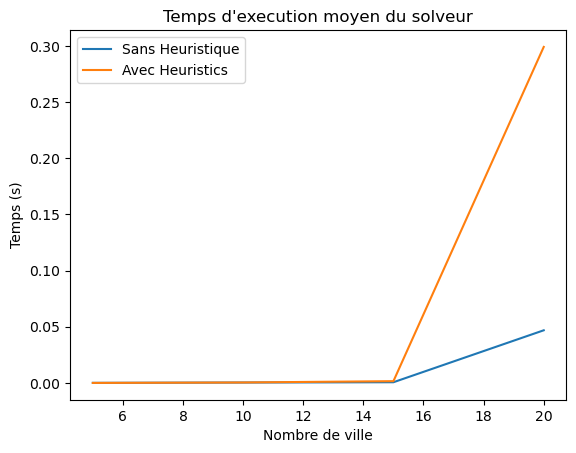

In [36]:
# Heuristique
import time

nb_instances = 100
nb_obj = 100 
poids_min, poids_max, val_min, val_max = 500,1000,500,1000 
Capacity = 1000
random.seed(a=3)
#Listes pour stocker les résultats
l_temps_moyens = []
l_temps_moyens_avec_presolve = []
nb_objets_a_tester = [5, 10, 15, 20]
for nb_obj in nb_objets_a_tester:

    coordinates = generate_random_coordinates(nb_obj)
    latitudes, longitudes = zip(*coordinates)
    scaler_lat = MinMaxScaler(feature_range=(0, 100))
    scaler_lon = MinMaxScaler(feature_range=(0, 100))
    x_scaled = scaler_lon.fit_transform(np.array(longitudes).reshape(-1, 1)).flatten()
    y_scaled = scaler_lat.fit_transform(np.array(latitudes).reshape(-1, 1)).flatten()
    scaled_coordinates = list(zip(x_scaled, y_scaled))
    distance_matrix = calculeDistance()

    n = len(scaled_coordinates)

    adjacency_list = adjacency_list_calc()

    cvrp_model = Model("CVRP")

    # Variables de décision pour les trajets (x)
    x = cvrp_model.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

    # Variables de décision pour les charges des camions (u)
    u = cvrp_model.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

    # fonction objective : minimiser la distance totale parcourue
    cvrp_model.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                    for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    ## Contraintes
    # chaque ville doit être visitée exactement une fois
    for j in range(1, n):
        cvrp_model.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

    # chaque camion part du dépôt et revient au dépôt
    for k in range(num_trucks):
        cvrp_model.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
        cvrp_model.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

    # capacité des camions
    for k in range(num_trucks):
        cvrp_model.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

    # chaque camion commence et finit au dépôt et respecte la capacité
    for k in range(num_trucks):
        for i in range(1, n):
            cvrp_model.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
            cvrp_model.addConstr(u[k, i] <= truck_capacity)
            cvrp_model.addConstr(u[k, i] >= demand[i])
            for j in range(1, n):
                if i != j:
                    cvrp_model.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

    # sous-tours MTZ
    for k in range(num_trucks):
        for i in range(1, n):
            for j in range(1, n):
                if i != j:
                    cvrp_model.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])


    cvrp_model2 = Model("CVRP")

    # Variables de décision pour les trajets (x)
    x = cvrp_model2.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

    # Variables de décision pour les charges des camions (u)
    u = cvrp_model2.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

    # fonction objective : minimiser la distance totale parcourue
    cvrp_model2.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                    for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    ## Contraintes
    # chaque ville doit être visitée exactement une fois
    for j in range(1, n):
        cvrp_model2.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

    # chaque camion part du dépôt et revient au dépôt
    for k in range(num_trucks):
        cvrp_model2.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
        cvrp_model2.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

    # capacité des camions
    for k in range(num_trucks):
        cvrp_model2.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

    # chaque camion commence et finit au dépôt et respecte la capacité
    for k in range(num_trucks):
        for i in range(1, n):
            cvrp_model2.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
            cvrp_model2.addConstr(u[k, i] <= truck_capacity)
            cvrp_model2.addConstr(u[k, i] >= demand[i])
            for j in range(1, n):
                if i != j:
                    cvrp_model2.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

    # sous-tours MTZ
    for k in range(num_trucks):
        for i in range(1, n):
            for j in range(1, n):
                if i != j:
                    cvrp_model2.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])

    cvrp_model.setParam('Cuts', 0)
    cvrp_model.setParam('Presolve', 0)
    cvrp_model.setParam('Heuristics', 0)
    cvrp_model.setParam('OutputFlag', 0)

    cvrp_model2.setParam('Presolve', 0)
    cvrp_model2.setParam('Cuts', 0)
    cvrp_model2.setParam('Heuristics', 1)
    cvrp_model2.setParam('OutputFlag',0)

    somme_temps = 0
    somme_temps_presolve = 0
    for i in range(nb_instances):
        
        # Calcul sans presolve
        start_time = time.time()
        cvrp_model2.optimize()
        computation_time=  time.time() - start_time
        somme_temps_presolve +=computation_time

        start_time = time.time()
        cvrp_model.optimize()
        computation_time=  time.time() - start_time
        somme_temps +=computation_time
        
    l_temps_moyens.append(somme_temps/nb_instances)
    l_temps_moyens_avec_presolve.append(somme_temps_presolve/nb_instances)

plt.plot(nb_objets_a_tester,l_temps_moyens,label= "Sans Heuristique")
plt.plot(nb_objets_a_tester,l_temps_moyens_avec_presolve,label="Avec Heuristics")
plt.xlabel("Nombre de ville")
plt.ylabel("Temps (s)")
plt.title("Temps d'execution moyen du solveur")
plt.legend()

## **Tous les paramètres**

Voici les résultats obtenus avec des instances variant de 1 à 20 villes avec tous les paramètres activés : 

Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 1
Set parameter Cuts to value 1
Set parameter Heuristics to value 1
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1 Pro
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 82 rows, 60 columns and 312 nonzeros
Model fingerprint: 0xeb7f949f
Variable types: 10 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Found heuristic solution: objective 373.7756541
Presolve removed 42 rows and 12 columns
Presolve time: 0.00s
Presolved: 40 rows, 48 columns, 232 nonzeros
Variable types: 8 continuous, 40 integer (40 binary)

Root relaxation: objective 2.787873e+02, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    | 

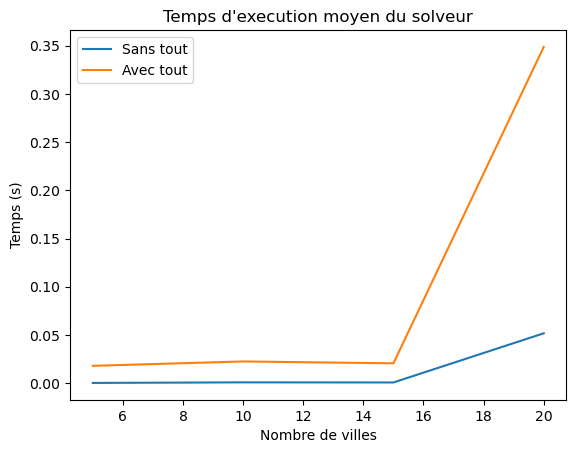

In [37]:
# Tous les paramètres 
import time

nb_instances = 100
nb_obj = 100 
poids_min, poids_max, val_min, val_max = 500,1000,500,1000 
Capacity = 1000
random.seed(a=3)
#Listes pour stocker les résultats
l_temps_moyens = []
l_temps_moyens_avec_presolve = []
nb_objets_a_tester = [5, 10, 15, 20]
for nb_obj in nb_objets_a_tester:

    coordinates = generate_random_coordinates(nb_obj)
    latitudes, longitudes = zip(*coordinates)
    scaler_lat = MinMaxScaler(feature_range=(0, 100))
    scaler_lon = MinMaxScaler(feature_range=(0, 100))
    x_scaled = scaler_lon.fit_transform(np.array(longitudes).reshape(-1, 1)).flatten()
    y_scaled = scaler_lat.fit_transform(np.array(latitudes).reshape(-1, 1)).flatten()
    scaled_coordinates = list(zip(x_scaled, y_scaled))
    distance_matrix = calculeDistance()

    n = len(scaled_coordinates)

    adjacency_list = adjacency_list_calc()

    cvrp_model = Model("CVRP")

    # Variables de décision pour les trajets (x)
    x = cvrp_model.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

    # Variables de décision pour les charges des camions (u)
    u = cvrp_model.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

    # fonction objective : minimiser la distance totale parcourue
    cvrp_model.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                    for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    ## Contraintes
    # chaque ville doit être visitée exactement une fois
    for j in range(1, n):
        cvrp_model.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

    # chaque camion part du dépôt et revient au dépôt
    for k in range(num_trucks):
        cvrp_model.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
        cvrp_model.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

    # capacité des camions
    for k in range(num_trucks):
        cvrp_model.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

    # chaque camion commence et finit au dépôt et respecte la capacité
    for k in range(num_trucks):
        for i in range(1, n):
            cvrp_model.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
            cvrp_model.addConstr(u[k, i] <= truck_capacity)
            cvrp_model.addConstr(u[k, i] >= demand[i])
            for j in range(1, n):
                if i != j:
                    cvrp_model.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

    # sous-tours MTZ
    for k in range(num_trucks):
        for i in range(1, n):
            for j in range(1, n):
                if i != j:
                    cvrp_model.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])


    cvrp_model2 = Model("CVRP")

    # Variables de décision pour les trajets (x)
    x = cvrp_model2.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

    # Variables de décision pour les charges des camions (u)
    u = cvrp_model2.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

    # fonction objective : minimiser la distance totale parcourue
    cvrp_model2.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                    for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    ## Contraintes
    # chaque ville doit être visitée exactement une fois
    for j in range(1, n):
        cvrp_model2.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

    # chaque camion part du dépôt et revient au dépôt
    for k in range(num_trucks):
        cvrp_model2.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
        cvrp_model2.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

    # capacité des camions
    for k in range(num_trucks):
        cvrp_model2.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

    # chaque camion commence et finit au dépôt et respecte la capacité
    for k in range(num_trucks):
        for i in range(1, n):
            cvrp_model2.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
            cvrp_model2.addConstr(u[k, i] <= truck_capacity)
            cvrp_model2.addConstr(u[k, i] >= demand[i])
            for j in range(1, n):
                if i != j:
                    cvrp_model2.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

    # sous-tours MTZ
    for k in range(num_trucks):
        for i in range(1, n):
            for j in range(1, n):
                if i != j:
                    cvrp_model2.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])

    cvrp_model.setParam('Cuts', 0)
    cvrp_model.setParam('Presolve', 0)
    cvrp_model.setParam('Heuristics', 0)
    cvrp_model.setParam('OutputFlag', 0)

    cvrp_model2.setParam('Presolve', 1)
    cvrp_model2.setParam('Cuts', 1)
    cvrp_model2.setParam('Heuristics', 1)
    cvrp_model2.setParam('OutputFlag',1)

    somme_temps = 0
    somme_temps_presolve = 0
    for i in range(nb_instances):
        
        # Calcul sans presolve
        start_time = time.time()
        cvrp_model2.optimize()
        computation_time=  time.time() - start_time
        somme_temps_presolve +=computation_time

        start_time = time.time()
        cvrp_model.optimize()
        computation_time=  time.time() - start_time
        somme_temps +=computation_time
        
    l_temps_moyens.append(somme_temps/nb_instances)
    l_temps_moyens_avec_presolve.append(somme_temps_presolve/nb_instances)

plt.plot(nb_objets_a_tester,l_temps_moyens,label= "Sans tout")
plt.plot(nb_objets_a_tester,l_temps_moyens_avec_presolve,label="Avec tout")
plt.xlabel("Nombre de villes")
plt.ylabel("Temps (s)")
plt.title("Temps d'execution moyen du solveur")
plt.legend()

## **Cut**

Voici les résultats obtenus avec des instances variant de 1 à 20 villes avec cut : 


Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 1
Set parameter Heuristics to value 0
Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 1
Set parameter Heuristics to value 0
Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 1
Set parameter Heuristics to value 0
Set parameter Cuts to value 0
Set parameter Presolve to value 0
Set parameter Heuristics to value 0
Set parameter Presolve to value 0
Set parameter Cuts to value 1
Set parameter Heuristics to value 0


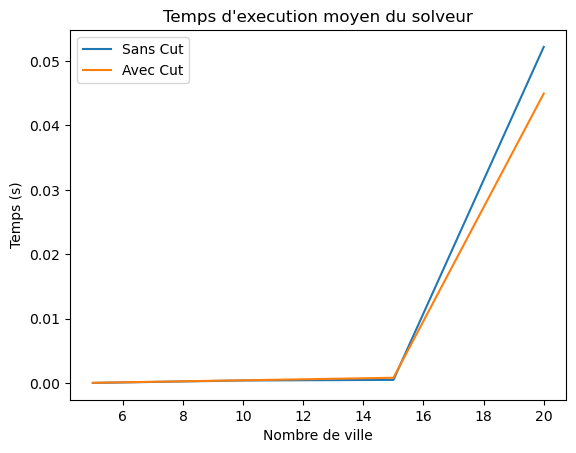

In [38]:
# Cut
import time

nb_instances = 100
nb_obj = 100 
poids_min, poids_max, val_min, val_max = 500,1000,500,1000 
Capacity = 1000
random.seed(a=3)
#Listes pour stocker les résultats
l_temps_moyens = []
l_temps_moyens_avec_presolve = []
nb_objets_a_tester = [5, 10, 15, 20]
for nb_obj in nb_objets_a_tester:

    coordinates = generate_random_coordinates(nb_obj)
    latitudes, longitudes = zip(*coordinates)
    scaler_lat = MinMaxScaler(feature_range=(0, 100))
    scaler_lon = MinMaxScaler(feature_range=(0, 100))
    x_scaled = scaler_lon.fit_transform(np.array(longitudes).reshape(-1, 1)).flatten()
    y_scaled = scaler_lat.fit_transform(np.array(latitudes).reshape(-1, 1)).flatten()
    scaled_coordinates = list(zip(x_scaled, y_scaled))
    distance_matrix = calculeDistance()

    n = len(scaled_coordinates)

    adjacency_list = adjacency_list_calc()

    cvrp_model = Model("CVRP")

    # Variables de décision pour les trajets (x)
    x = cvrp_model.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

    # Variables de décision pour les charges des camions (u)
    u = cvrp_model.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

    # fonction objective : minimiser la distance totale parcourue
    cvrp_model.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                    for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    ## Contraintes
    # chaque ville doit être visitée exactement une fois
    for j in range(1, n):
        cvrp_model.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

    # chaque camion part du dépôt et revient au dépôt
    for k in range(num_trucks):
        cvrp_model.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
        cvrp_model.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

    # capacité des camions
    for k in range(num_trucks):
        cvrp_model.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

    # chaque camion commence et finit au dépôt et respecte la capacité
    for k in range(num_trucks):
        for i in range(1, n):
            cvrp_model.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
            cvrp_model.addConstr(u[k, i] <= truck_capacity)
            cvrp_model.addConstr(u[k, i] >= demand[i])
            for j in range(1, n):
                if i != j:
                    cvrp_model.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

    # sous-tours MTZ
    for k in range(num_trucks):
        for i in range(1, n):
            for j in range(1, n):
                if i != j:
                    cvrp_model.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])


    cvrp_model2 = Model("CVRP")

    # Variables de décision pour les trajets (x)
    x = cvrp_model2.addVars(num_trucks, n, n, vtype=GRB.BINARY, name="x")

    # Variables de décision pour les charges des camions (u)
    u = cvrp_model2.addVars(num_trucks, n, vtype=GRB.CONTINUOUS, name="u")

    # fonction objective : minimiser la distance totale parcourue
    cvrp_model2.setObjective(quicksum(distance_matrix[i][j] * x[k, i, j]
                                    for k in range(num_trucks) for i in range(n) for j in range(n) if i != j), GRB.MINIMIZE)

    ## Contraintes
    # chaque ville doit être visitée exactement une fois
    for j in range(1, n):
        cvrp_model2.addConstr(quicksum(x[k, i, j] for k in range(num_trucks) for i in range(n) if i != j) == 1)

    # chaque camion part du dépôt et revient au dépôt
    for k in range(num_trucks):
        cvrp_model2.addConstr(quicksum(x[k, 0, j] for j in range(1, n)) == 1)
        cvrp_model2.addConstr(quicksum(x[k, j, 0] for j in range(1, n)) == 1)

    # capacité des camions
    for k in range(num_trucks):
        cvrp_model2.addConstr(quicksum(demand[j] * x[k, i, j] for i in range(n) for j in range(1, n)) <= truck_capacity)

    # chaque camion commence et finit au dépôt et respecte la capacité
    for k in range(num_trucks):
        for i in range(1, n):
            cvrp_model2.addConstr(quicksum(x[k, i, j] for j in range(n) if i != j) == quicksum(x[k, j, i] for j in range(n) if i != j))
            cvrp_model2.addConstr(u[k, i] <= truck_capacity)
            cvrp_model2.addConstr(u[k, i] >= demand[i])
            for j in range(1, n):
                if i != j:
                    cvrp_model2.addConstr(u[k, j] >= u[k, i] + demand[j] - truck_capacity * (1 - x[k, i, j]))

    # sous-tours MTZ
    for k in range(num_trucks):
        for i in range(1, n):
            for j in range(1, n):
                if i != j:
                    cvrp_model2.addConstr(u[k, i] - u[k, j] + truck_capacity * x[k, i, j] <= truck_capacity - demand[j])

    cvrp_model.setParam('Cuts', 0)
    cvrp_model.setParam('Presolve', 0)
    cvrp_model.setParam('Heuristics', 0)
    cvrp_model.setParam('OutputFlag', 0)

    cvrp_model2.setParam('Presolve', 0)
    cvrp_model2.setParam('Cuts', 1)
    cvrp_model2.setParam('Heuristics', 0)
    cvrp_model2.setParam('OutputFlag',0)

    somme_temps = 0
    somme_temps_presolve = 0
    for i in range(nb_instances):
        
        # Calcul sans presolve
        start_time = time.time()
        cvrp_model2.optimize()
        computation_time=  time.time() - start_time
        somme_temps_presolve +=computation_time

        start_time = time.time()
        cvrp_model.optimize()
        computation_time=  time.time() - start_time
        somme_temps +=computation_time
        
    l_temps_moyens.append(somme_temps/nb_instances)
    l_temps_moyens_avec_presolve.append(somme_temps_presolve/nb_instances)

plt.plot(nb_objets_a_tester,l_temps_moyens,label= "Sans Cut")
plt.plot(nb_objets_a_tester,l_temps_moyens_avec_presolve,label="Avec Cut")
plt.xlabel("Nombre de ville")
plt.ylabel("Temps (s)")
plt.title("Temps d'execution moyen du solveur")
plt.legend()

## **Études expérimentales et analyse du solveur**

Nous avons testé plusieurs instances plus ou moins difficile, variant de 5 à 25 villes avec un nombre de camion variant de 1 à 5. Les résultats sont très concluant avec Pulp et Gurobi. 

Gurobi est tout de même beaucoup plus performant que Pulp pour la réalisation d'un instance du problème d'optimisation de tournée. 

Il est également possible d'activer des paramètres dans le solveur pour inclure des heuristiques, le branch and bound et presolve. Ces paramètres sont utiles notamment pour des grandes instances qui ne peuvent pas être résolu rapidement dans le solveur mais qui va chercher à trouver une solution de plus en plus rapproché de la solution optimale. 

Presolve et les heuristiques ne sont pas très utiles pour nos instances car les courbes montrent que les instances prennent plus de temps. Cut permet une légère optimisation. Et la combinaison des 3 n'est pas du tout utile dans notre cas car on peut le voir sur le premier graphique il demande beaucoup plus de temps de résolution. 

## **Conclusion** 

Dans ce projet, nous avons abordé le problème de la tournée de véhicules (VRP) pour optimiser les itinéraires de livraison. En utilisant des modèles mathématiques et des solveurs comme Pulp et Gurobi, nous avons cherché à minimiser les coûts et les émissions de gaz à effet de serre.

###  **Perspectives d'amélioration**

- Intégration du Temps (CVRPTW) :

Ajouter des fenêtres de temps pour les livraisons afin de répondre aux contraintes temporelles spécifiques des clients.

- Création d'une Interface Utilisateur :

Développer une interface pour faciliter la saisie des données et la visualisation des résultats en temps réel.

- Intégration de la Capacité Mixte des Camions :

Permettre la gestion de flottes hétérogènes avec des capacités variées pour optimiser l'utilisation des ressources disponibles.

- Plateforme de Coordination :

Créer une plateforme de coordination pour permettre la collaboration entre plusieurs entreprises, maximisant l'efficacité des livraisons entre entreprises.